# Thinking1:MVC框架指的是什么

- MVC全名是Model View Controller，是模型(model)－视图(view)－控制器(controller)的缩写，一种软件设计典范，用一种业务逻辑、数据、界面显示分离的方法组织代码，将业务逻辑聚集到一个部件里面，在改进和个性化定制界面及用户交互的同时，不需要重新编写业务逻辑。具体来说，
1. Model是与数据库相关的模型层
2. Views是网页的地址，以及渲染网页等
3. Controller是访问网页地址后，读取页面数据，调用业务逻辑

# Thinking2:基于 Python的可视化技术有哪些
- matplotlib,seaborn
- wordcloud
- graphviz
- networkx
- echarts, pyecharts
- PowerBI,Tableau,FineBI,Superset

# Action1:购物篮词云分析

In [ ]:
# 词云展示
from wordcloud import WordCloud 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from PIL import Image 
from lxml import etree 
from nltk.tokenize import word_tokenize 
from collections import defaultdict

In [44]:
#去掉停用词
def remove_stop_words(f):
    stop_words = ['\'']
    for stop_word in stop_words:
        f = f.replace(stop_word,'')
    return f 


In [53]:
# 生成词云
# from scipy.misc import imread
# bg_pic = imread('Anne_Hathaway.png')
def create_word_cloud(f):
    print('根据词频，开始生成词云！')
    f = remove_stop_words(f)
    cut_text = word_tokenize(f)
    cut_text = ''.join(cut_text)
    wc = WordCloud(
         max_words = 100,
        width = 2000,
        height = 1200,
    )
    wordcloud = wc.generate(cut_text)
    # 写词云图片
    wordcloud.to_file('wordcloud.jpg')
    # 显示词云文件
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [4]:
# 数据加载
import pandas as pd 
data = pd.read_csv('./L2/homework_MarketBasket/Market_Basket_Optimisation.csv',header = None)

In [5]:
# 将数据存放到 transactions 中
from collections import defaultdict
transactions = []
item_count = defaultdict(int)
for i in range(data.shape[0]):
    temp = []
    for j in range(data.shape[1]):
        item = str(data.values[i,j])
        if item != 'nan':
            temp.append(item)
            item_count[item] += 1
    transactions.append(temp)

In [57]:
all_word = ''.join('%s' %(item) for item in transactions)

根据词频，开始生成词云！


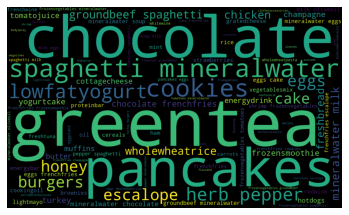

In [58]:
# 生成词云
create_word_cloud(all_word)

In [9]:
sorted(item_count.items(), key = lambda x:x[1], reverse = True)[:10]

[('mineral water', 1788),
 ('eggs', 1348),
 ('spaghetti', 1306),
 ('french fries', 1282),
 ('chocolate', 1230),
 ('green tea', 991),
 ('milk', 972),
 ('ground beef', 737),
 ('frozen vegetables', 715),
 ('pancakes', 713)]